In [1]:
import pandas as pd

In [2]:
df_trans=pd.read_excel('QVI_transaction_data.xlsx')
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### SUMMARY

In [3]:
df_trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


### DETECTING AND REMOVING OUTLIERS

In [4]:
import seaborn as sns

c:\users\bhavy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

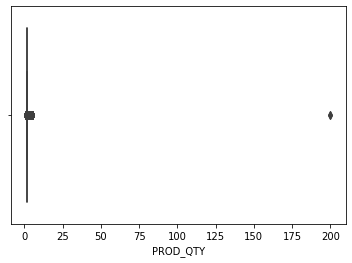

In [5]:
sns.boxplot(df_trans.PROD_QTY)

c:\users\bhavy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

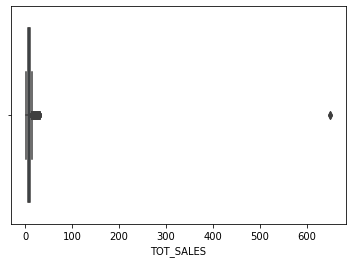

In [6]:
sns.boxplot(df_trans.TOT_SALES)

In [7]:
import numpy as np

In [8]:
np.percentile(df_trans.PROD_QTY,90)

2.0

In [9]:
np.percentile(df_trans.TOT_SALES,90)

10.8

In [11]:
df_trans.TOT_SALES=np.where(df_trans.TOT_SALES>10.8,10.8,df_trans.TOT_SALES)

In [12]:
df_trans.TOT_SALES.describe()

count    264836.000000
mean          7.216702
std           2.347676
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max          10.800000
Name: TOT_SALES, dtype: float64

In [13]:
df_trans.PROD_QTY=np.where(df_trans.PROD_QTY>2.0,2.0,df_trans.PROD_QTY)
df_trans.PROD_QTY.describe()

count    264836.000000
mean          1.896094
std           0.305139
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: PROD_QTY, dtype: float64

### DATA TYPES 

In [15]:
df_trans.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY          float64
TOT_SALES         float64
dtype: object